In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
from unidecode import unidecode
from sklearn.metrics import f1_score

In [18]:
dataset = pd.read_csv('dataset_tccV003.csv', index_col=0)

In [19]:
dataset.describe()

,nome_produto,categoria
count,18391,18391
unique,18391,320
top,DESINFETANTE 1L YPE PINHO TRADICAO,CALÇADO ADULTO
freq,1,200


In [20]:
dataset['categoria'].value_counts()

CALÇADO ADULTO            200
SORVETE                   200
MATERIAL ESCOLAR          200
FARINÁCEO                 200
SALGADINHO E APERITIVO    200
                         ... 
UTENSÍLIOS DE MELAMINA     10
GELÉIA DE MOCOTÓ           10
VEGETAL                    10
EMPADA                     10
ESFIHA                      9
Name: categoria, Length: 320, dtype: int64

In [36]:
ds_train, ds_validacao = train_test_split(dataset, test_size = 0.20, random_state = 42, stratify=dataset['categoria'])

In [37]:
ds_validacao['categoria'].value_counts()

CERVEJA                      40
BOMBONIERE                   40
SHAMPOO                      40
VINHO                        40
IOGURTE                      40
                             ..
TOALHA UMEDECIDA INFANTIL     2
MASSA PRONTA                  2
ESFIHA                        2
EMPADA                        2
AMIDO DE MILHO                2
Name: categoria, Length: 320, dtype: int64

In [38]:
ds_train

,nome_produto,categoria
10208,LIMP PESADA MR MUSCULO CITRUS 500ML,LIMPEZA PESADA
9550,LAVA ROUPA PO ARIEL OXIAZUL 1KG,LAVA ROUPA PÓ
14573,SACO LIXO EMBALIXO ROLO C/2 AZ 50L C/20,SACOS
13492,BISNAGUINHA PANCO INTEGRAL 300G,PÃES
5571,CREME PENTEAR MONANGE 300G CACHOS PERFEITOS,CREME DE PENTEAR
...,...,...
9353,SANDUICHE 145g SEARA HOT HIT BACON GRIL,LANCHE PRONTO
12334,SACO ALVEJADO 40X65cm ALPLASTIPEL,PANOS/FLANELAS
3922,COLCHA CORTTEX SOLT BOUTIS 1.6X2.3 K/ROS,CAMA
9687,BETERRABA ESPECIAL kg BAND,LEGUMES


In [39]:
ds_validacao

,nome_produto,categoria
3455,CAFE GUIDALLI ALMOFADA PCT 500G,CAFÉ
5963,OLEO BANANA BEIRA ALTA 90ML,CREME/ÓLEO MÃO E PÉ
8928,IOGURTE JAMAVA 110G C/ POLPA MORANGO,IOGURTE
3318,CHALEIRA ELET CADENCE I SUPRE 127 CEL500,CAFETEIRA/CHALEIRA ELETRICA
14229,SAB BAR EMOZIONI IN TOSCANA CAMPAGNE DORATA250G,SABONETE BARRA
...,...,...
13242,PURIF AR AERO NO AR JARDIM/POMAR 360ML,PURIFICADOR DE AR
18166,VINHO NACIONAL LUIZ PORTO CHARD SEC BCO 750ML,VINHO
5702,CR TRAT WELLA PRO SERIES REPAIR 300ML,CREME PARA TRATAMENTO
9919,LENCO UMED CLIN OFF EX SV RF 400UND,LENÇO UMEDECIDO INFANTIL


In [40]:
class PreProcessing():
    def __init__(self, dataset):
        self.dataset = dataset
        
    def putCharBtw(self, x, letra, sep):
        rex = re.compile('[0-9]'+letra)
        if rex.search(x)==None:
            return x
        else:
            inicio = (rex.search(x).start())+1
            newString = x[:inicio]+sep+x[inicio:]
            return newString    
    

    def replaceWord(self, text, antiga, nova):
        text = [nova if t == antiga else t for t in text.split()]
        return ' '.join(text)

    
    def clean_text(self,text):
        """
            text: a string

            return: modified initial string
        """
        text = text.lower() # padroniza o texto para minusculo
        # text = unidecode(text) # retira acentuação do texto

        text = self.replaceWord(text,'d', ' ')  # substitui o "d" quando sozinho por espaço.
        text = self.replaceWord(text, 'n', ' ') # substitui o "n" quando sozinho por espaço.
        text = self.replaceWord(text,'c', ' ') # substitui o "c" quando sozinho por espaço.
        text = self.replaceWord(text, 'pcte', 'pct') # padroniza o pcte como pct
        text = self.replaceWord(text,'pt', 'pct') # padroniza o pt como pct
        text = text.replace(r'c/',' com ') # padroniza o "c/" para "com"
        text = text.replace(r"\.c/",' com ') # padroniza o ".c/" para "com"
        text = text.replace(r'-c/',' com ') # padroniza o "-c/" para "com"
        text = text.replace(' s/',' sem ') # padroniza o "s/" para "sem"
        text = text.replace(r'\.s/',' sem ') # padroniza o ".s/" para "sem"
        text = text.replace(r'-s/',' sem ') # padroniza o "-s/" para "sem"
        text = text.replace(' p/',' para ') # padroniza o "p/" para "para"
        text = text.replace(r'\.p/',' para ') # padroniza o ".p/" para "para"
        text = text.replace(r'-p/',' para ') # padroniza o "-p/" para "para"
        text = self.replaceWord(text,'unid', 'un') # padroniza o "unid" para "un"
        text = self.putCharBtw(text,'ml',' ')  #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'kg',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'g',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'gr',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'cm',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'l',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'mm',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'mt',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'un',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        
        REPLACE_BY_SPACE_RE = re.compile('\[/(){}\[\]\|@,;.+-')
        text = REPLACE_BY_SPACE_RE.sub(' ', text) #substitui simbolos por expaço
        
        BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_-]')
        text = BAD_SYMBOLS_RE.sub('', text) # qualquer simbolo fora do alfabeto é retirado e substituido por nada.
       
        text = text.replace('  ',' ') #se tiver mais de um espaco em branco é substituido por somente 1 espaço em branco
        text = text.replace('  ',' ') #se tiver mais de um espaco em branco é substituido por somente 1 espaço em branco
        return text

    def processar(self):
        dataset_processed = self.dataset.copy()
        dataset_processed['nome_produto_processed'] = dataset_processed['nome_produto'].apply(self.clean_text).copy()
        return dataset_processed

In [41]:
preprocess = PreProcessing(ds_train)

In [42]:
dataset_processed = preprocess.processar()

In [43]:
#tratativa do label
le = preprocessing.LabelEncoder()
labels = le.fit_transform(dataset_processed['categoria'])
dataset_processed['categoria_encoded'] = labels

In [44]:
dataset_processed[dataset_processed['nome_produto_processed'].str.contains('001x')]

,nome_produto,categoria,nome_produto_processed,categoria_encoded
12256,KIT MOP ACASA CESTO INOX C/PED SBXH-001X,PANOS/FLANELAS,kit mop acasa cesto inox com ped sbxh-001x,220


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset_processed['nome_produto_processed'].values)

In [46]:
list_test = ['Felipe Calixto fez um teste','Felipe comprou um cachorro']
v_test = CountVectorizer()
sample = v_test.fit_transform(list_test)
df2 = pd.DataFrame(sample.toarray().transpose(),
                   index=v_test.get_feature_names())
df2 

,0,1
cachorro,0,1
calixto,1,0
comprou,0,1
felipe,1,1
fez,1,0
teste,1,0
um,1,1


In [47]:
#todas as palavras
print(f' Quantidade de palavras {len(vectorizer.get_feature_names())}')
print(f' primeiras vinte palavras {(vectorizer.get_feature_names()[:20])}')

 Quantidade de palavras 14287
 primeiras vinte palavras ['00', '0006', '0008', '001', '001x', '002', '0021b', '0025395', '0025491', '003', '0036', '003651', '0042', '0042a', '00575', '006', '00acuc', '01', '01044', '01050']


In [48]:
X

<14712x14287 sparse matrix of type '<class 'numpy.int64'>'
	with 86823 stored elements in Compressed Sparse Row format>

In [49]:
#a frequencia das palavras na frase
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
preprocess = PreProcessing(ds_validacao)
dataset_val = preprocess.processar()
le = preprocessing.LabelEncoder()
labels = le.fit_transform(dataset_val['categoria'])
dataset_val['categoria_encoded'] = labels
X_val = vectorizer.transform(dataset_val['nome_produto_processed'].values)


In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
clf.fit(X, dataset_processed['categoria_encoded'])
val_pred = clf.predict(X_val)
f1_score(dataset_val['categoria_encoded'], val_pred, average='micro')

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [52]:
def getCategoriaPred(dataset):
    le = preprocessing.LabelEncoder()
    encode = le.fit_transform(dataset['categoria'])
    dataset['categoria_pred'] = le.inverse_transform(ds_analise['pred_encode'])
    return dataset


In [46]:
from sklearn.naive_bayes import MultinomialNB
clfNB = MultinomialNB()
clfNB.fit(X, dataset_processed['categoria_encoded'])
valNB_pred = clfNB.predict(X_val)
f1_score(dataset_val['categoria_encoded'], valNB_pred, average='micro')

In [69]:
from sklearn.neighbors import KNeighborsClassifier
clfKNN = KNeighborsClassifier(2)
clfKNN.fit(X, dataset_processed['categoria_encoded'])
valKNN_pred = clfKNN.predict(X_val)
f1_score(dataset_val['categoria_encoded'], valKNN_pred, average='micro')

0.7012775210655069

In [51]:
from sklearn.ensemble import RandomForestClassifier
clfRF = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clfRF.fit(X, dataset_processed['categoria_encoded'])
valRF_pred = clfRF.predict(X_val)
f1_score(dataset_val['categoria_encoded'], valRF_pred, average='micro')

0.8480565371024735

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
clfGBC = GradientBoostingClassifier(learning_rate=0.01,n_estimators=100,max_depth=3,random_state=42 )
clfGBC.fit(X, dataset_processed['categoria_encoded'])
valGBC_pred = clfGBC.predict(X_val)
f1_score(dataset_val['categoria_encoded'], valGBC_pred, average='micro')

0.8480565371024735

In [80]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X, dataset_processed['categoria_encoded'])
clf_pred = clf.predict(X_val)
f1_score(dataset_val['categoria_encoded'], clf_pred, average='micro')

0.900516444686056

In [80]:
from sklearn.svm import LinearSVC, SVC
clf = LinearSVC(C=0.5,random_state=0, tol=1e-5)
clf.fit(X, dataset_processed['categoria_encoded'])
clf_pred = clf.predict(X_val)
f1_score(dataset_val['categoria_encoded'], clf_pred, average='micro')

0.9029627616200054

In [79]:
#score com os dados Trainamento
clf.score(X, dataset_processed['categoria_encoded'])

0.9997960848287113

In [100]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(penalty="l2", alpha=0.001)
clf.fit(X, dataset_processed['categoria_encoded'])
clf_pred = clf.predict(X_val)
f1_score(dataset_val['categoria_encoded'], clf_pred, average='micro')

0.7681435172601252

In [83]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

In [55]:
import scipy.sparse as sp
from sklearn.model_selection import cross_val_score
merged_data = sp.vstack((X,X_val), format='csr') 
merged_y = dataset_processed['categoria_encoded'].append(dataset_val['categoria_encoded'])
scores = cross_val_score(clf, merged_data, merged_y, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9082 (+/- 0.0121)


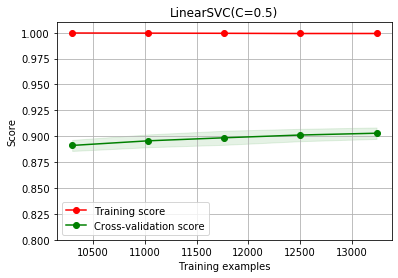

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plot_learning_curve(clf, "LinearSVC(C=0.5)",
                    merged_data, merged_y, ylim=(0.8, 1.01),
                    train_sizes=np.linspace(.7, .9, 5))

In [92]:
np.linspace(.7, .9, 5)

array([0.7 , 0.75, 0.8 , 0.85, 0.9 ])

In [152]:
ds_analise = dataset_val.copy()
ds_analise['pred_encode'] = clf_pred
ds_analise = getCategoriaPred(ds_analise)

from sklearn.metrics import confusion_matrix, classification_report
classificacao = classification_report(ds_analise['categoria'], ds_analise['categoria_pred'],
                      output_dict=True)
classif1 = pd.DataFrame(classificacao).transpose()
pd.options.display.max_rows = 999
classif1.sort_values(["support",'f1-score'], ascending= (False,True)).head(333)

,precision,recall,f1-score,support
macro avg,0.890756,0.865551,0.867522,3679.000000
weighted avg,0.905216,0.901876,0.899099,3679.000000
UTENSÍLIOS DE PLÁSTICO,0.707317,0.725000,0.716049,40.000000
UTENSÍLIOS DE INOX/ALUMÍNIO,0.756098,0.775000,0.765432,40.000000
CONDIMENTO NATURAL,0.761905,0.800000,0.780488,40.000000
UTENSÍLIOS DE VIDRO,0.906250,0.725000,0.805556,40.000000
FARINÁCEO,0.850000,0.850000,0.850000,40.000000
VERDURAS,0.833333,0.875000,0.853659,40.000000
ARTIGOS PARA FESTAS,0.916667,0.825000,0.868421,40.000000
LEGUMES,0.857143,0.900000,0.878049,40.000000


In [153]:
ds_analise.to_csv("modelo_bow_v002.csv",index_label='index',sep=';')

## TÉCNICA TFIDF

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_Tfidf = vectorizer.fit_transform(dataset_processed['nome_produto_processed'].values)
X_val_Tfidf = vectorizer.transform(dataset_val['nome_produto_processed'].values)

In [104]:
list_test = ['Felipe Calixto fez um teste','Felipe comprou um cachorro']
v_test = TfidfVectorizer()
sample = v_test.fit_transform(list_test)
df2 = pd.DataFrame(sample.toarray().transpose(),
                   index=v_test.get_feature_names())
df2 

,0,1
cachorro,0.000000,0.576152
calixto,0.499221,0.000000
comprou,0.000000,0.576152
felipe,0.355200,0.409937
fez,0.499221,0.000000
teste,0.499221,0.000000
um,0.355200,0.409937


In [105]:
X_Tfidf.shape

(14712, 14287)

In [74]:
from sklearn.linear_model import LogisticRegression
clf_Tfidf = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
clf_Tfidf.fit(X_Tfidf, dataset_processed['categoria_encoded'])
val_pred_Tfidf = clf_Tfidf.predict(X_val_Tfidf)
f1_score(dataset_val['categoria_encoded'], val_pred_Tfidf, average='micro')

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [103]:
clf = MultinomialNB()
clf.fit(X_Tfidf, dataset_processed['categoria_encoded'])
clf_pred = clf.predict(X_val_Tfidf)
f1_score(dataset_val['categoria_encoded'], clf_pred, average='micro')

0.6374014677901604

In [104]:
clf = KNeighborsClassifier(2)
clf.fit(X_Tfidf, dataset_processed['categoria_encoded'])
clf_pred = clf.predict(X_val_Tfidf)
f1_score(dataset_val['categoria_encoded'], clf_pred, average='micro')

0.7480293558032075

In [76]:
clfRF = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clfRF.fit(X_Tfidf, dataset_processed['categoria_encoded'])
valRF_pred = clfRF.predict(X_val_Tfidf)
f1_score(dataset_val['categoria_encoded'], valRF_pred, average='micro')

0.8404457733079641

In [77]:
clfRF = GradientBoostingClassifier(learning_rate=0.01,n_estimators=100,max_depth=3, random_state=42)
clfRF.fit(X_Tfidf, dataset_processed['categoria_encoded'])
valRF_pred = clfRF.predict(X_val_Tfidf)
f1_score(dataset_val['categoria_encoded'], valRF_pred, average='micro')

0.7722207121500407

In [107]:
from sklearn.svm import LinearSVC
clfSVC = LinearSVC(C=0.5,random_state=0, tol=1e-5)
clfSVC.fit(X_Tfidf, dataset_processed['categoria_encoded'])
SVC_pred = clfSVC.predict(X_val_Tfidf)
f1_score(dataset_val['categoria_encoded'], SVC_pred, average='micro')


0.8945365588475129

In [135]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_Tfidf, dataset_processed['categoria_encoded'])
clf_pred = clf.predict(X_val_Tfidf)
f1_score(dataset_val['categoria_encoded'], clf_pred, average='micro')

0.9037782005979885

In [106]:
import scipy.sparse as sp
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(random_state=1, max_iter=300)
merged_data = sp.vstack((X_Tfidf,X_val_Tfidf), format='csr') 
merged_y = dataset_processed['categoria_encoded'].append(dataset_val['categoria_encoded'])
scores = cross_val_score(clf, merged_data, merged_y, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9107 (+/- 0.0101)


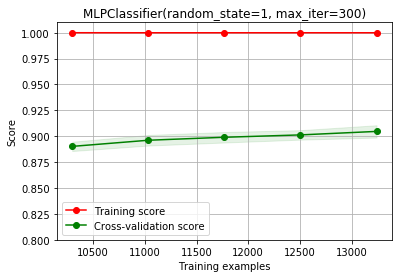

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plot_learning_curve(clf, "MLPClassifier(random_state=1, max_iter=300)",
                    merged_data, merged_y, ylim=(0.8, 1.01),
                    train_sizes=np.linspace(.7, .9, 5))

In [109]:
ds_analise = dataset_val.copy()
ds_analise['pred_encode'] = clf_pred
ds_analise = getCategoriaPred(ds_analise)

from sklearn.metrics import confusion_matrix, classification_report
classificacao = classification_report(ds_analise['categoria'], ds_analise['categoria_pred'],
                      output_dict=True)
classif1 = pd.DataFrame(classificacao).transpose()
pd.options.display.max_rows = 999
classif1.sort_values(["support",'f1-score'], ascending= (False,True)).head(333)

C:\Users\MANAGER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
macro avg,0.740164,0.662057,0.670912,3679.000000
weighted avg,0.800808,0.768144,0.763792,3679.000000
UTENSÍLIOS DE VIDRO,0.791667,0.475000,0.593750,40.000000
UTENSÍLIOS DE PLÁSTICO,0.621622,0.575000,0.597403,40.000000
UTENSÍLIOS DE INOX/ALUMÍNIO,0.648649,0.600000,0.623377,40.000000
LEGUMES,0.806452,0.625000,0.704225,40.000000
CONDIMENTO NATURAL,0.875000,0.700000,0.777778,40.000000
FARINÁCEO,0.794872,0.775000,0.784810,40.000000
COLORAÇÃO FEMININA,0.739130,0.850000,0.790698,40.000000
SALGADINHO E APERITIVO,0.815789,0.775000,0.794872,40.000000


In [147]:
ds_analise.to_csv("modelo_tfidf_v002.csv",index_label='index',sep=';')

In [ ]:
ds_analise[ds_analise['categoria']=='CAMA']